In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

### Data Generation
We fist generate data from a linear model.

In [2]:
def gen_data (n_samp=1000):

    X = np.random.normal(0, 0.1, n_samp)

    noise = np.random.normal(0, 0.1, n_samp) #np.random.uniform(-10,10, size=(n_samp,))
    beta = 2
    y = beta * X + noise
    data = pd.DataFrame({'x':X, 'y':y})
    return data

In [3]:
data = gen_data()

### Plotting the data



<AxesSubplot: xlabel='x', ylabel='y'>

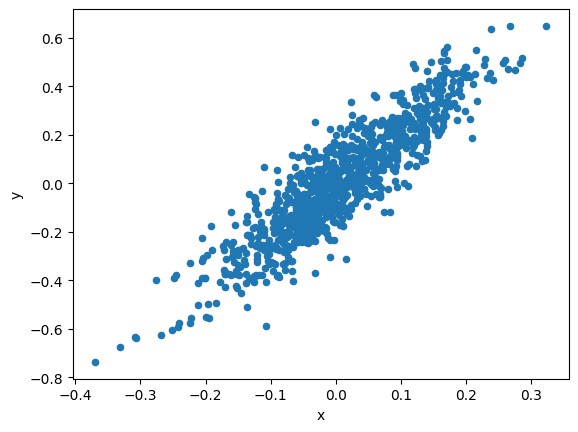

In [4]:
data.plot('x', 'y', kind='scatter')

# Accounting for Coefficient Uncertainty
Since we consider linear models and independent samples $y_i$, we assume the following distribution for our response $Y$,
    \begin{align}  \label{eq1}
    P(Y \mid X, \beta) &=\prod_{i=1}^n  p(y_i \mid x_i, \beta)\\
    p(y_i \mid x_i, \beta) &\sim \mathcal N (y_i \mid x_i^T \beta, \sigma^2) \quad (1)
    \end{align}
    
In addition, since we want to argue about coefficient uncertainty, we also place some distribution $D$ over the parameters $\beta$.
    

### Part (a)
We first assume that the coefficient distribution is Gaussian, $\beta \sim \mathcal N (0, \phi^2)$.
 
Complete the function below with the expression you found in the theoretical exercise for
    $\text{log} \Big( p(\beta)  p(Y \mid X, \beta) \Big)\;.$

In [5]:
def log_term(beta, params_beta, data):
    mu_beta, sig_beta = params_beta
    
    rss = np.linalg.norm(data.y - data.x * beta, ord=2)
    reg = np.linalg.norm(beta - mu_beta, ord=2)
    
    var_y = np.var(data.y, ddof = 1)
    l = 1 / (sig_beta)**2
    
    return - rss / var_y - l * reg

In [6]:
beta = np.array([2])
print(log_term(beta, (1, 1), data))

-61.113271411247226


###  Part (b)

Solve the expression 
    $\text{max}_\beta \text{log} \Big( p(\beta)  p(Y \mid X, \beta) \Big)\; (5.2)$ 
for $\beta$.

In [7]:
#Hint function:
import scipy.optimize as optimize

def neg_log_term(*args):
    return -log_term(*args)

beta_init = np.random.normal(0,1)
estimate = optimize.minimize(neg_log_term, beta_init, ((0,0.25), data)).x[0] # using lambda = 16
print(f"estimate = {estimate}")

estimate = 1.7768330658638072


### Part (c)

Sample different values for $\beta$ from a Gaussian distribution and create a histogram over these. Indicate the estimate for $\beta$ that you found in part (b).

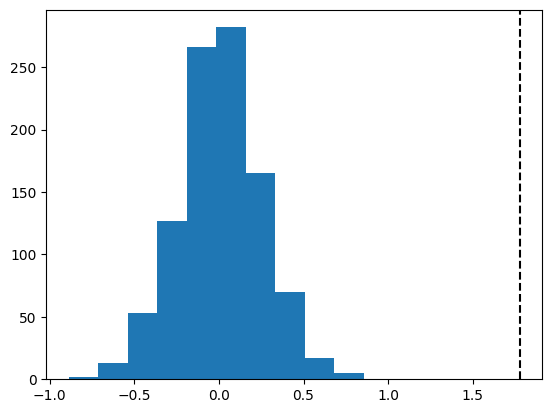

In [8]:
beta_init = np.random.normal(0,1)
def beta_chart(params_beta, estimate, title = None):
    mu_beta, sig_beta = params_beta
    fig = plt.figure()
    plt.hist(np.random.normal(mu_beta, sig_beta, 1000))
    plt.axvline(estimate, color = "k", linestyle = "dashed")
    plt.title(title)
    plt.show()

beta_chart((0,0.25), estimate)

## Part (d) 
Repeat parts (b) and (c) with increasing numbers of datapoints, e.g., $n=10, n=100, n=1000$.

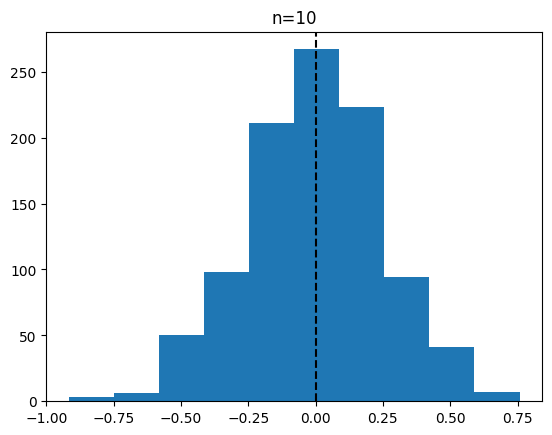

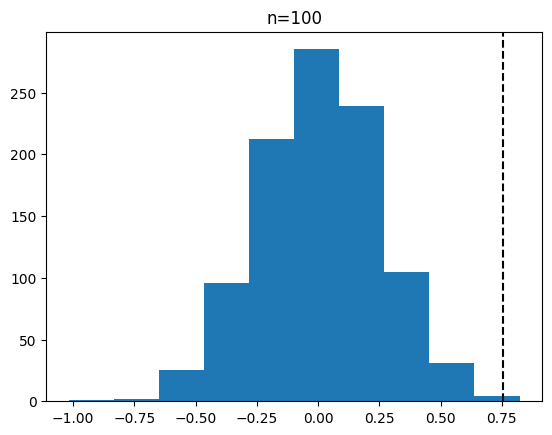

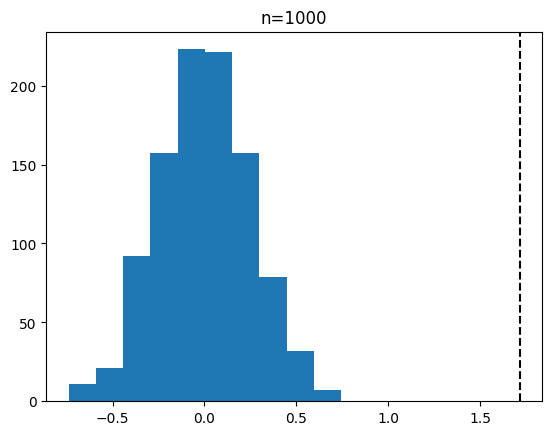

In [9]:
beta_init = np.random.normal(0,1)
params_beta = (0, 0.25)
for n in (10, 100, 1000):
    data_n = gen_data(n)
    estimate_n = optimize.minimize(neg_log_term, beta_init, (params_beta, data_n)).x[0]
    beta_chart(params_beta, estimate_n, title = f"n={n}")

Can you observe a trend?

At low values of n, the loss function is dominated by the regularization term, and hence the optimizer opts for beta = 0. This is due to the RSS terms having only a few terms, and thus a much lesser value compared to the quadratic regularization term. 
However, as n increases, the RSS term begins to have an effect, and the optimizer trys to find a compromise between the two terms.